In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
#Define sigmoid and sigmoid derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [4]:
#Inputs and targets
X = np.array([
    [0.1, 1.2], [0.7, 1.8], [0.8, 1.6], 
    [0.8, 0.6], [1.0, 0.8],
    [0.3, 0.5], [0.0, 0.2], [-0.3, 0.8], 
    [-0.5, -1.5], [-1.5, -1.3]
])

Y = np.array([
    [1, 0], [1, 0], [1, 0], 
    [0, 0], [0, 0],
    [1, 1], [1, 1], [1, 1], 
    [0, 1], [0, 1]
])


In [5]:
#Set parameters and initialize weights and biases
input_nodes = 2
output_nodes = 2
learning_rate = 0.1
epochs = 1000

weights = np.random.uniform(-1, 1, (input_nodes, output_nodes))
biases = np.zeros((1, output_nodes))

In [9]:
#Plot Function
def plot_decision_boundary(weights, biases, X, Y, epoch):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + biases)
    Z1 = Z[:, 0].reshape(xx.shape)
    Z2 = Z[:, 1].reshape(xx.shape)

    plt.figure(figsize=(8, 6))

    contour1 = plt.contour(xx, yy, Z1, levels=[0.5], colors='magenta')
    contour2 = plt.contour(xx, yy, Z2, levels=[0.5], colors='darkviolet')

    group_colors = ['red', 'blue', 'green', 'orange']
    scatter_handles = []
    for i, binary_code in enumerate([[1, 0], [0, 0], [1, 1], [0, 1]]):
        group_indices = np.all(Y == binary_code, axis=1)
        scatter = plt.scatter(X[group_indices, 0], X[group_indices, 1], c=group_colors[i], s=40, edgecolors='k', label=f'Group {i + 1}')
        scatter_handles.append(scatter)

    legend_handles = scatter_handles + [
        Line2D([0], [0], color='magenta', lw=2, label='Boundary Line 1'),
        Line2D([0], [0], color='darkviolet', lw=2, label='Boundary Line 2')
    ]
    
    plt.title(f'Decision Boundary after {epoch} epochs')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend(handles=legend_handles)
    plt.show()

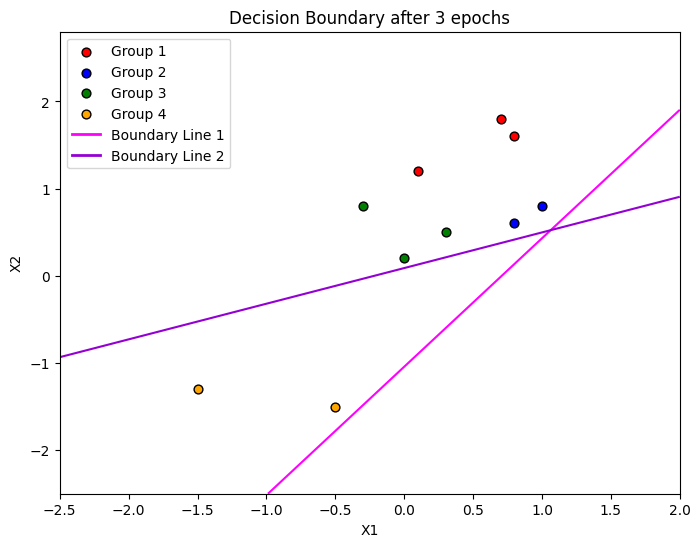

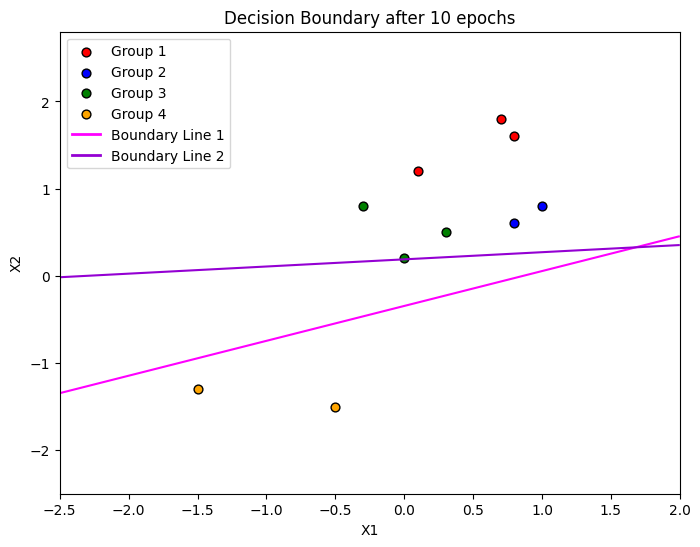

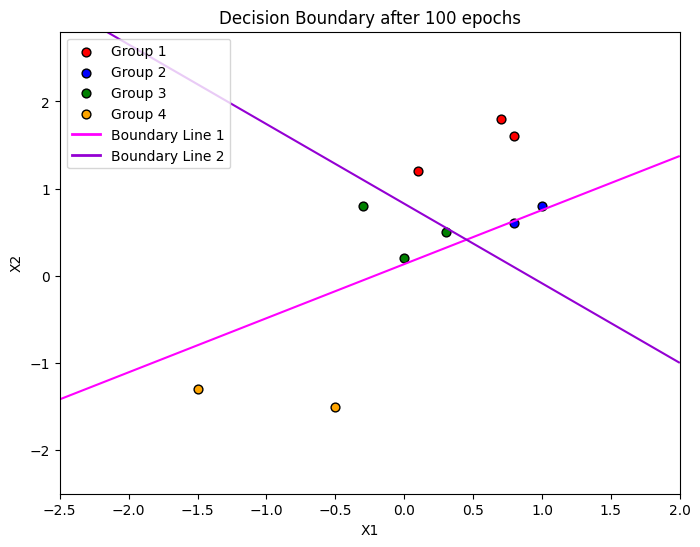

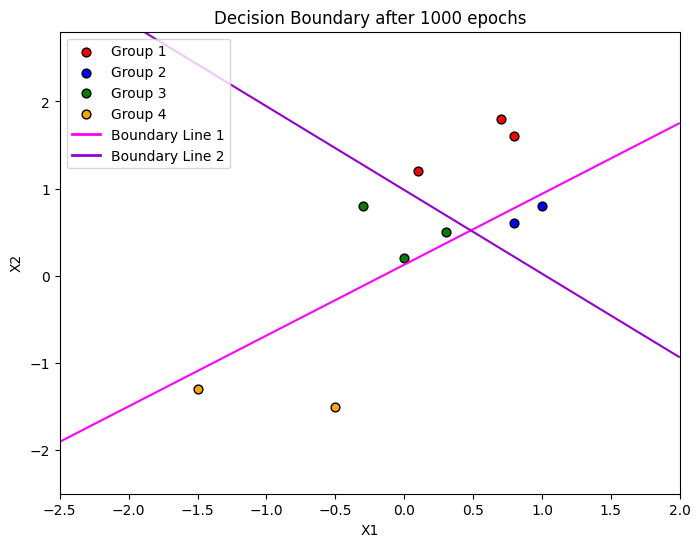

In [10]:
#Training
errors = []
epoch_check = [3, 10, 100, 1000]

for epoch in range(epochs + 1):
    #Forward pass
    z = np.dot(X, weights) + biases
    output = sigmoid(z)

    #Calculate Error
    error = Y - output
    errors.append(np.mean(np.abs(error)))

    #Backward pass
    d_output = error * sigmoid_derivative(output)
    
    #Update weights and biases
    weights += learning_rate * np.dot(X.T, d_output)
    biases += learning_rate * np.sum(d_output, axis=0)

    if epoch in epoch_check:
        plot_decision_boundary(weights, biases, X, Y, epoch)




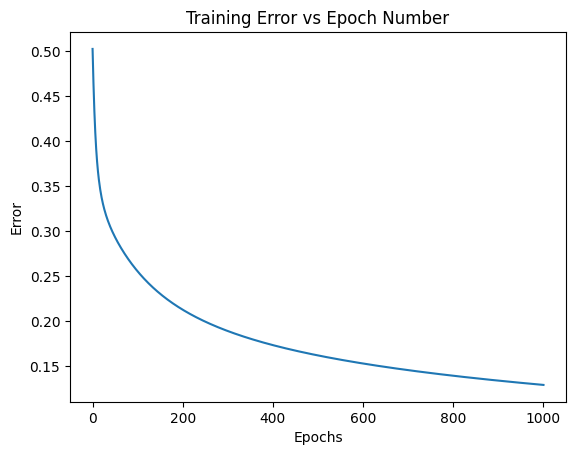

In [11]:
plt.figure()
plt.plot(errors)
plt.title("Training Error vs Epoch Number")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()